# Uso de las Series de Fourier en el oscilador armónico amortiguado con forzamiento.

#### Dr. Ricardo Méndez Fragoso

En este $notebook$ se presenta una aplicación de las Series de Fourier para modelar un oscilador armónico con fricción y forzamiento periódico con forma arbitraria. En este espacio, se entenderá como forma arbitraría una función continua por pedazos, acotada y con un número finito de discontinuidades. Note que este tipo de funciones son las que se presentan con mayor frecuencia en la mayoría de los problemas físicamente realizables.

Para comenzar llamaremos a las librerías mas comunes en cómputo científico.

In [1]:
from math import *
from cmath import *
from numpy import *
from scipy.integrate import *
from pylab import *
from scipy import *
%matplotlib inline

Supongamos que tenemos un sistema que puede vibrar y disipar energía. El modelo más sencillo está gobernado por la ecuación diferencial:
$$y'' + 2\gamma y' + \omega ^2 _0 y = 0$$
donde $\omega _0 \neq 0$ y típicamente se le llama frecuencia fundamental. Una forma de encontrar la solución a esta ecuación diferencial es proponiendo que ésta sea exponencial del tipo $e^{\lambda t}$. El valor de $\lambda$ se encuentra sustituir la función anterior en la ecuación diferencial obteniendo un polinomio de segundo orden en $\lambda$. Las raíces de dicho polinomio son:
$$\lambda _{\pm} = -\gamma \pm \sqrt{\gamma ^2 - \omega ^2 _0}$$
y como se puede observar el comportamiento de la solución depende del término dentro de la raíz cuadrada.

Para $\gamma ^2 - \omega ^2 _0 >0$ las soluciones son exponenciales decrecientes ya que $\gamma > 0$ haciendo que $\lambda _{\pm}$ siempre sea negativo. Con ello la solución homogénea de la ecuación es $y_h (t) = A e^{\lambda_+ t} + B  e^{\lambda_- t} $, con $A$ y $B$ determinadas por las condiciones iniciales. A esta situación se le llama caso sobreamortiguado ya que no tiene vibraciones.

Para $\gamma ^2 - \omega ^2 _0 < 0$ los eigenvalores son complejos dando soluciones $e^{-\gamma t} (\cos \omega _s t + i \sin \omega _s t)$, donde $\omega ^2 _s = |\gamma ^2 - \omega ^2 _0|$. En este caso la parte real y la imaginaria constituyen las soluciones linealmente independientes a la ecuación diferencial y por lo tanto la solucón homogénea es $y_h (t) = e^{-\gamma t}( A \cos \omega_s t + B  \sin \omega _s t )$, donde $A$ y $B$ se obtienen de las condiciones iniciales.

El caso particular $\gamma ^2 = \omega ^2 _0$ es conocido como el el caso críticamente amortiguado ya que sólo se tiene un valor para $\lambda$. En este caso se utiliza reducción de orden para encontrar la otra solución linealmente independiente. Con ello la solución homogénea es $y_h (t) = e^{-\gamma t}(A +B t)$, donde $A$ y $B$ se obtienen de las condiciones iniciales.

La función que se muesrta a continuación proporciona los eigenvalores y los coeficientes $A$ y $B$ en términos de las condiciones iniciales $y(0)=y_0$ y $y'(0)=y'_0$.

In [2]:
def coef(param):
    # Formato de entrada de la variable param: gamma, omega, y(0), y'(0)
    gamma,omega0,y0,dy0 = param[0], param[1], param[2], param[3]
    Delta = (gamma**2) - (omega0**2)
    if Delta < 0:
        lambdap = -gamma + 1j*sqrt( abs(Delta) )
        lambdam = -gamma - 1j*sqrt( abs(Delta) )
        print u"Solución con oscilaciones y frecuencia: ", sqrt(abs(Delta))
    else:
        lambdap = -gamma + sqrt( Delta )
        lambdam = -gamma - sqrt( Delta )
        print u"Solución con decaimiento"
    A = ((y0*lambdam) - dy0 )/(lambdam - lambdap)
    B = (dy0 - (y0*lambdap) )/(lambdam - lambdap)
    return A,B,lambdam,lambdap

Como se mencionó anteriormente el comportamiento de la solución homogénea a la ecuación diferencial está en términos de los eigenvalores $\lambda _{\pm}$ y los coeficientes $A$ y $B$ se calculan a partir de las condiciones iniciales. Estos últimos pueden llegar a ser complejos, pero cuando se tienen condiciones iniciales reales se obtienen combinaciones de tal manera que el resultado es una función real. La siguiente función calcula la solución en términos de las condiciones iniciales para un intervalo de tiempo contenido en la variable $t$.

In [3]:
def sol_h(param,t):
    A,B,lambdam,lambdap = coef(param)
    yt = ( A*exp(lambdap*t) ) + ( B*exp(lambdam*t) )
    return yt.real

A continuación se presenta un ejemplo de cómo se utilizan los programas anteriores para calcular la solución en términos de los parámetros $\gamma = 0.1$ y $\omega _0 = 2$, y las condiciones iniciales $y(0)=1$ y $y'(1)=0$.

Solución con oscilaciones y frecuencia:  1.99749843554


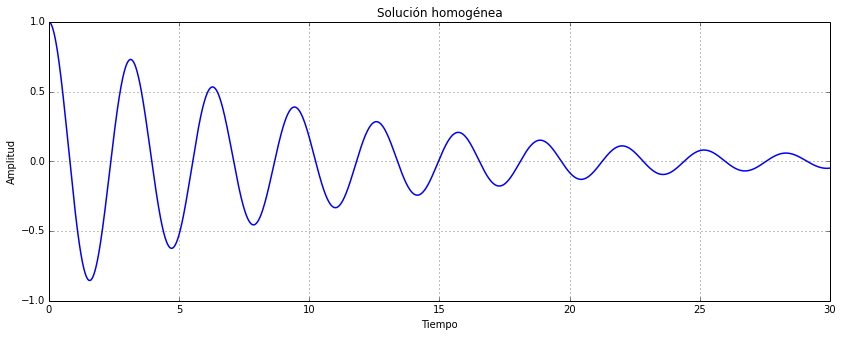

In [4]:
gamma = 0.1
omega0 = 2.
y0 = 1.
dy0 = 0.
dt = 0.001
param = [gamma,omega0,y0,dy0]
t=arange(0.,50*omega0,dt)
yh = sol_h(param,t)
fig = figure(figsize=(14,5), dpi=100)
title(u'Solución homogénea')
xlabel('Tiempo')
ylabel('Amplitud')
xlim([0,30])
grid(True)
plot(t,yh,"b",lw=1.5)

Supongamos que tenemos un forzamiento dado por $g(t)$. Encontrar la solución particular puede resultar sencillo si se trata de funciones polinomiales, exponenciales y trigonométricas. Si el forzamiento es de tipo polinomial, $g(t)=\sum ^N _{n=0} a_n t^n$, la solución particular es un polinomio de grado $n$, $y_p (t) = \sum ^N _{n=0} A_n t^n$, y los coeficientes, $A_n$, quedan determinados al sustituir $y_p(t)$ en la ecuación diferencial e igualando las potencias de $t$.

Cuando se tienen exponenciales como forzamiento, $g(t)=Fe^{at}$, la solución particular es:
$$y_p (t) = \frac{F}{a^2 + 2\gamma a + \omega^2 _0} e^{at}.$$

Cuando el forzamiento es con funciones trigonométricas, como por ejemplo $g(t)=F\cos \omega_f t$, las soluciones son:
$$y_p (t) = \frac{F}{(\omega _0 ^2 - \omega ^2 _f )^2 + 4 \gamma^2 \omega ^2 _f} \left( (\omega _0 ^2 - \omega ^2 _f )\cos\omega _f t + 2 \gamma \omega _f \sin \omega _f t \right)=\frac{F}{\sqrt{(\omega _0 ^2 - \omega ^2 _f )^2 + 4 \gamma^2 \omega ^2 _f}} \cos(\omega_f - \phi)$$
donde 
$\cos \phi = \frac{(\omega _0 ^2 - \omega ^2 _f )}{\sqrt{(\omega _0 ^2 - \omega ^2 _f )^2 + 4 \gamma^2 \omega ^2 _f}}$ y $\sin \phi = \frac{2\gamma \omega _f}{\sqrt{(\omega _0 ^2 - \omega ^2 _f )^2 + 4 \gamma^2 \omega ^2 _f}}$.

En este último caso la solución particular es acotada, pero se puede ver amplificada si $\omega _f \approx \omega _0$ ya que el término $\frac{F}{\sqrt{(\omega _0 ^2 - \omega ^2 _f )^2 + 4 \gamma^2 \omega ^2 _f}}$ tiene el siguiente comportamiento.

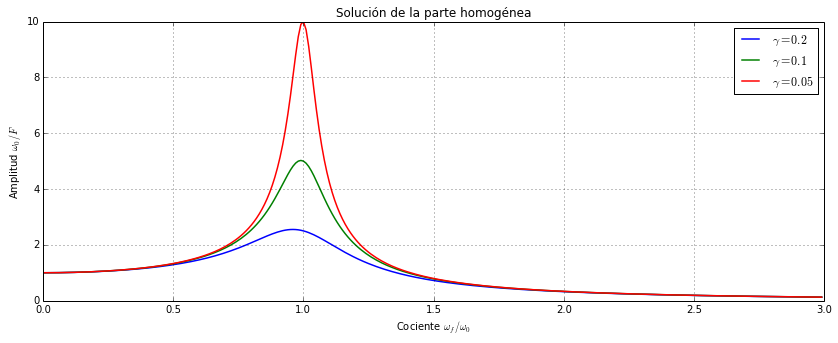

In [5]:
def amplitud_forzamiento(cociente,gamma):
    amplitud = 1/sqrt(((1-(cociente**2))**2) + ((2*gamma*cociente)**2) )
    return amplitud
cociente = arange(0,3,0.01)
fig = figure(figsize=(14,5), dpi=100)
title(u"Solución de la parte homogénea")
xlabel("Cociente $\omega_f / \omega_0$")
ylabel('Amplitud $\omega_0 / F$')
grid(True)
plot(cociente,amplitud_forzamiento(cociente,0.2),label="$\gamma = 0.2$",lw=1.5)
plot(cociente,amplitud_forzamiento(cociente,0.1),label="$\gamma = 0.1$",lw=1.5)
plot(cociente,amplitud_forzamiento(cociente,0.05),label="$\gamma = 0.05$",lw=1.5)
legend()

Si el forzamiento es periódico, y no tenemos una forma sencilla de encontrar la solución particular a la ecuación diferencial, es de mucha utilidad expresar la función $g(t)$ en términos de funciones que sean mas sencillas de manejar y que también sean periódicas. En la siguiente rutina se expone un par de ejemplos de funciones que podemos hacer periódicas
$$g_0 (t) = \cos \left( \frac{2\pi t}{L}\right)$$
$$g_1 (t) = -\frac{1}{2}t(t-L)$$

In [6]:
def gt_0(t,L):
    g = cos((2*pi*t)/L)
    return g

def gt_1(t,L):
    g = -0.5*t*(t-L)
    return g

donde $L$ será el periodo de la función. Una forma sencilla de hacer funciones periódicas, $g(t)=g(t+L)$, es utilizando el módulo $L$ del dominio de la función al momento de evaluar, como por ejemplo:

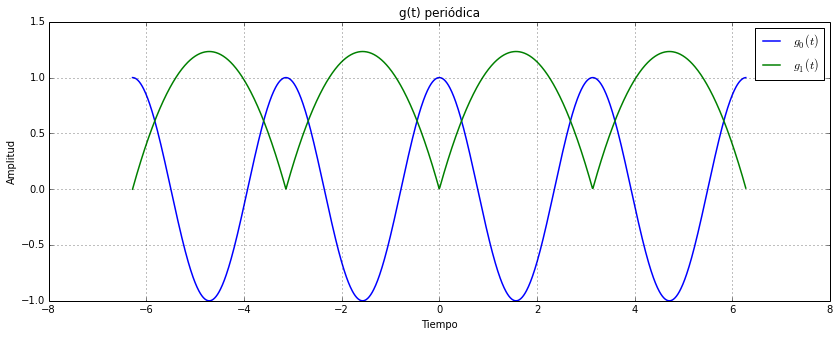

In [7]:
L = pi
x=arange(-2*L,2*L,0.01)
gt_orig = gt_0(x%L,L)
gt_parab = gt_1(x%L,L)
fig = figure(figsize=(14,5), dpi=100)
title(u'g(t) periódica')
xlabel('Tiempo')
ylabel('Amplitud')
plot(x,gt_orig,label="$g_0 (t)$",lw=1.5)
plot(x,gt_parab,label="$g_1 (t)$",lw=1.5)
grid(True)
legend()

Cuando la exitación es periódica resulta conveniente expresar el forzamiento en términos de su serie de Fourier.
$$g(t) = a_0 + \sum ^{\infty} _{n=1} a_n \cos \left( \frac{2 n \pi}{L} t\right) + b_n \sin \left( \frac{2 n \pi}{L} t\right) $$
donde los coeficientes $a_n$ y $b_n$ están dados por
$$a_0 = \frac{1}{L} \int ^L _0 g(t) dt $$ 
$$a_n = \frac{2}{L} \int ^L _0 g(t) \cos \left( \frac{2 n \pi}{L} t\right) dt $$ 
$$b_n = \frac{2}{L} \int ^L _0 g(t) \sin \left( \frac{2 n \pi}{L} t\right) dt $$

De esta manera se tiene una descomposición en términos de funciones trigonométricas con soluciones analíticas para cada componenete de la suma. Cabe notar que la serie de Fourier es convergente y por ello los coeficientes de la serie son cada vez más pequeños. En la siguiente rutina se calculan los coeficientes de la serie de Fourier para una función $g(t)$ arbitraria. 

In [8]:
def coef_serie(n,L,gt):
    ai = zeros(n)
    bi = zeros(n)
    for i in range(0,n):
        ai[i] = quad(lambda t: gt(t,L)*cos((2*i*pi*t)/L),0.,L)[0]
        bi[i] = quad(lambda t: gt(t,L)*sin((2*i*pi*t)/L),0.,L)[0]
    ai = (2*ai)/L
    bi = (2*bi)/L
    ai[0] = ai[0]/2
    return ai,bi

Hay que notar los coeficientes $a_n$ representan la parte par de la función y los $b_n$ la parte impar. Si pensamos al espacio de funciones como un espacio vectorial, estos coeficientes los podemos entender como la magnitud de la proyección de la función $g(t)$ a lo largo de las componentes de la base del espacio: $\cos \left( \frac{2 n \pi}{L} t\right)$ y $\sin \left( \frac{2 n \pi}{L} t\right)$. Los coeficientes están indexados por $n \in \mathbb{N}$, misma que representa la $n$-ésima componente o “dirección” en el espacio vectorial. La magnitud de estos coeficientes puede ayudarnos a comprender que cantidad de la función original es par o impar. No sólo ello, sino que también nos proporciona las proporciones de las funciones base del espacio vectorial, funciones trigonométricas, que debemos usar para reconstruir la función original. Un diagrama útil para hacer una representación de los coeficientes es poner en el eje $x$ los índices y en eje $y$ su magnitud $|a_n|$ y $-|b_n|$.

En la siguientes dos secciones de código se puede observar el comportamiento de los coeficientes para las funciones anteriores. Se puede observar que en el caso de la función trigonométrica $g_0(t) = \cos 2 \pi t$ se tiene una sola componente, como es de esperarse por tratarse de un elemento de la base del espacio vectorial, mientras que para la función $g_1(t) = -\frac{1}{2} t(t-L)$ se tienen más coeficientes $a_n$. Sin embargo, en ambas funciones los coeficientes $b_n$ son cero debido a la paridad de las funciones.

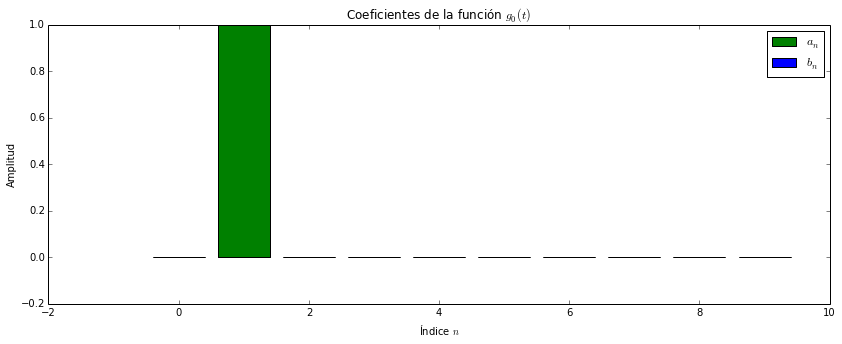

In [9]:
Nterminos = 10
ai_0,bi_0 = coef_serie(Nterminos,L,gt_0)
fig = figure(figsize=(14,5), dpi=100)
title(u'Coeficientes de la función $g_0 (t)$')
xlabel(u'Índice $n$')
ylabel('Amplitud')
bar(range(Nterminos),abs(ai_0),align="center",color="green",label="$a_n$")
bar(range(Nterminos),-abs(bi_0),align="center",color="blue",label="$b_n$")
legend()

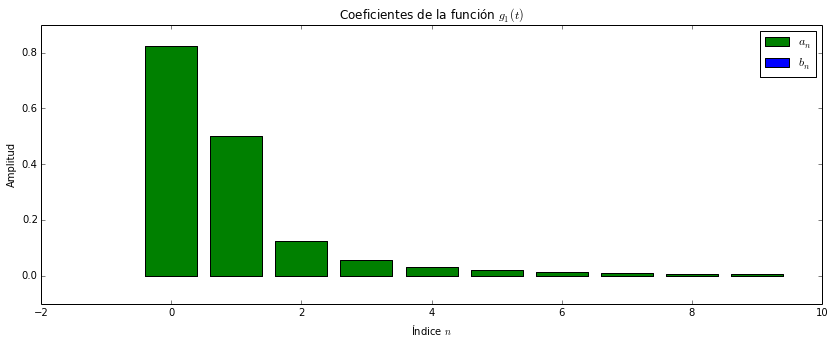

In [10]:
#Calculo de coeficientes
Nterminos = 10
ai_1,bi_1 = coef_serie(Nterminos,L,gt_1)
# Graficar coeficientes
fig = figure(figsize=(14,5), dpi=100)
title(u'Coeficientes de la función $g_1 (t)$')
xlabel(u'Índice $n$')
ylabel('Amplitud')
bar(range(Nterminos),abs(ai_1),align="center",color="green",label="$a_n$")
bar(range(Nterminos),-abs(bi_1),align="center",color="blue",label="$b_n$")
legend()

Como se puede observar los coeficientes disminuyen conforme aumenta el índice $n$. En general se tiene un conjunto de coeficientes representativos y los demás disminuyen rápidamente. Por esta razón se puede tomar un número finito de términos a fin de reconstruir la función, y entre más de ellos se consideren la aproximación de la serie a la función original será mejor. Una vez que se tienen los coeficientes es posible reconstruir la función a partir de su serie. La siguiente rutina sirve para calcular la serie de Fourier hasta un número determinado de términos.

In [11]:
def serie_gt(n,t,L,gt):
    ai,bi = coef_serie(n,L,gt)
    sgt = 0.
    for i in xrange(len(ai)):
        sgt = sgt + (ai[i]*cos((2*i*pi*t)/L)) + (bi[i]*sin((2*i*pi*t)/L))
    return sgt

A continuación se calculará la serie de Fourier de la función $g_1(t)$ periódica en los párrafos anteriores. En la gráfica que se incluye se puede observar una compración con la función original. Como se puede apreciar, entre mas términos se consideren la serie se tiene una mejor aproximación a la función $g_1(t)$ periódica.

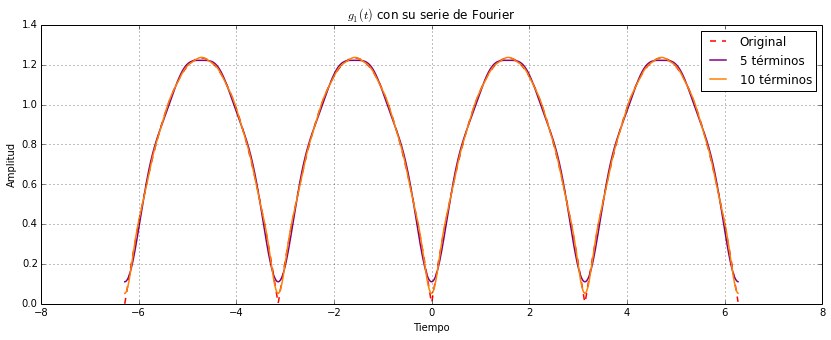

In [12]:
sgt_5 = serie_gt(5,x,L,gt_1)
sgt_10 = serie_gt(10,x,L,gt_1)
fig = figure(figsize=(14,5), dpi=100)
title('$g_1(t)$ con su serie de Fourier')
xlabel('Tiempo')
ylabel('Amplitud')
plot(x,gt_parab,"r--",label="Original",lw=1.5)
plot(x,sgt_5,color="purple",label=u"5 términos",lw=1.5)
plot(x,sgt_10,color="#FF7F00",ls="-",label=u"10 términos",lw=1.5)
grid(True)
legend()

En el caso de la función $g_0 (t)$ la aproximación y la función original son trivialmente la misma ya que sólo hay un coeficiente distinto de cero, $a_1$.

Un ejemplo mas interesante es la función $g_2 (t) = \frac{t}{L} - \frac{1}{2} + \left| \frac{t}{L} - \frac{1}{2} \right|$, misma que no es par ni impar por lo que uno esperaría que los coeficientes $a_n$ y $b_n$ de la serie de Fourier estuviesen presentes.

In [13]:
def gt_2(t,L):
    #g = t/L
    g = ((t/L)-0.5) + abs((t/L)-0.5)
    return g

La gráfica de la función anterior se puede generar de la siguiente manera.

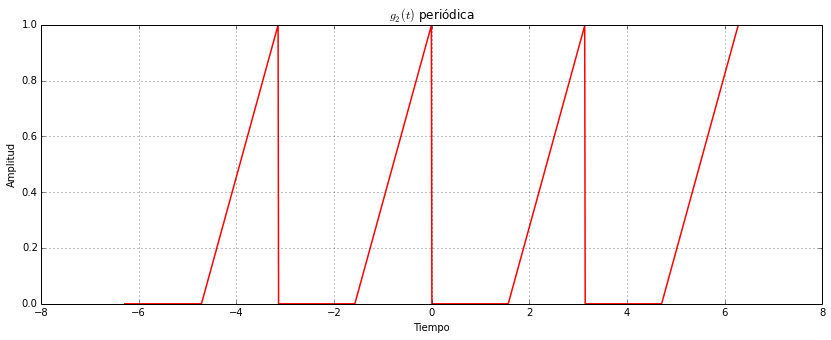

In [14]:
L_2 = pi
x_2=arange(-2*L_2,2*L_2,0.01)
gt_orig_2 = gt_2(x_2%L_2,L_2)
fig = figure(figsize=(14,5), dpi=100)
title(u'$g_2(t)$ periódica')
xlabel('Tiempo')
ylabel('Amplitud')
plot(x,gt_orig_2,"r",lw=1.5)
grid(True)

Los coeficientes de Fourier para la función $g_2 (t)$ se genran de manera análoga a las funciones anteriores.

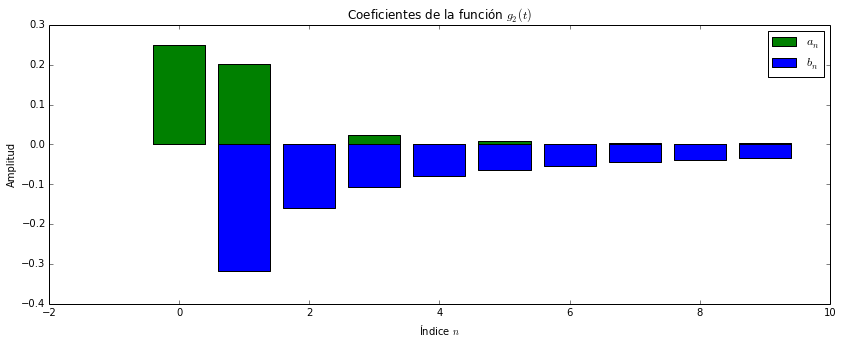

In [15]:
Nterminos_2 = 10
ai_2,bi_2 = coef_serie(Nterminos_2,L_2,gt_2)
fig = figure(figsize=(14,5), dpi=100)
title(u'Coeficientes de la función $g_2 (t)$')
xlabel(u'Índice $n$')
ylabel('Amplitud')
bar(range(Nterminos),abs(ai_2),align="center",color="green",label="$a_n$")
bar(range(Nterminos),-abs(bi_2),align="center",color="blue",label="$b_n$")
legend()

Como se puede observar en la gráfica anterior, se tienen los dos tipos de coeficientes de la serie de Fourier y también se puede ver como es que éstos decaen rápidamente. Por ello podemos tomar los primeros 10 coeficientes $a_n$ y $b_n$ para reconstruir la función original. De hecho, también se puede apreciar que hay una contribución mayor de la parte impar por la cantidad de coeficientes $b_n$ en comparación con los $a_n$.

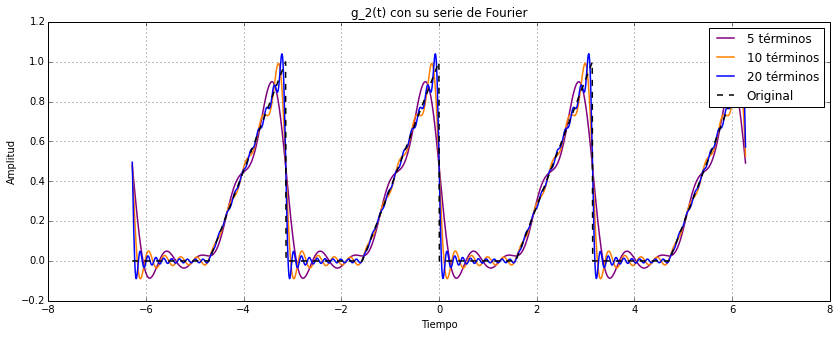

In [16]:
sgt2_5 = serie_gt(5,x_2,L_2,gt_2)
sgt2_10 = serie_gt(10,x_2,L_2,gt_2)
sgt2_20 = serie_gt(20,x_2,L_2,gt_2)
fig = figure(figsize=(14,5), dpi=100)
title('g_2(t) con su serie de Fourier')
xlabel('Tiempo')
ylabel('Amplitud')
plot(x_2,sgt2_5,color="purple",label=u"5 términos",lw=1.5)
plot(x_2,sgt2_10,color="#FF7F00",ls="-",label=u"10 términos",lw=1.5)
plot(x_2,sgt2_20,color="blue",ls="-",label=u"20 términos",lw=1.5)
plot(x_2,gt_orig_2,color="black",ls="--",label="Original",lw=1.5)
grid(True)
legend()

Ahora estamos es posibilidades de calcular el oscilador armónico amortiguado con un forzamiento arbitrario y periódico. Para ello calculemos la solución particular para cada componente de su serie de Fourier con las soluciones que vienen al principio de este $notebook$ cuando se tienen funciones trigonométricas.

La siguiente rutina descompone la función de forzamiento en su serie de Fourier, después calcula la solución particular para cada componente y finamente suma todas las contribuciones.

In [17]:
def sol_p(n,param,t,L,gt):
    gamma = param[0]
    omega0 = param[1]
    ai,bi = coef_serie(n,L,gt)
    vec_n = range(n)
    omegai = (array(vec_n)*2*pi)/L
    a,b = (omega0**2)-(omegai**2),2*gamma*omegai
    norma_up2 = (a*a) +(b*b)
    sol_p = 0.
    for i in range(len(ai)):
        sol_p += ( ai[i]*((a[i]*cos(omegai[i]*t)) + (b[i]*sin(omegai[i]*t)) ) )/norma_up2[i]
        sol_p += ( bi[i]*((a[i]*cos(omegai[i]*t)) - (b[i]*sin(omegai[i]*t)) ) )/norma_up2[i]
    return sol_p

Recordemos que los parámetros de la ecuación diferencial en este $notebook$ son $\gamma = 0.1$ y $\omega_0 = 2$. Calculemos la solución particular tomando 10 términos de la serie de Fourier con el forzamiento dado por $g_2(t)$.

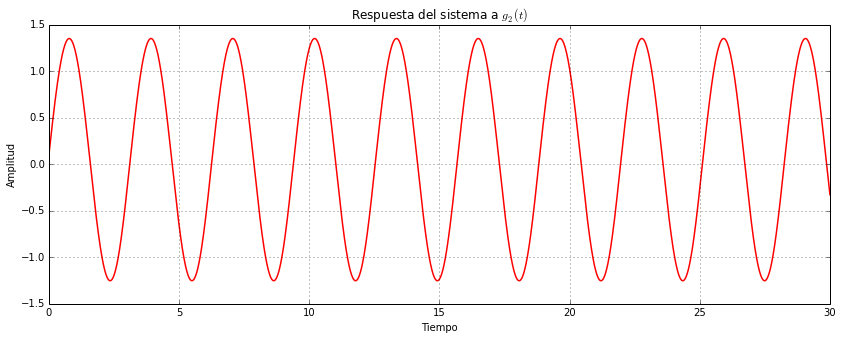

In [18]:
Nmax = 10
yp = sol_p(Nmax,param,t,L,gt_2)
fig = figure(figsize=(14,5), dpi=100)
title('Respuesta del sistema a $g_2(t)$')
xlabel('Tiempo')
ylabel('Amplitud')
xlim([0,30])
grid(True)
plot(t,yp,"r",lw=1.5)

La anterior gráfica es la respuesta del sistema ante el forzamiento inducido por $g_2(t)$. También se puede apreciar que en este caso la respuesta del sistema se ve amplificada. La razón es que los coeficientes $a_1$ y $b_1$ de la serie de Fourier de este forzamiento entran en resonancia con el sistema. Mas adelante se discutirá un poco más sobre este fenómeno, pero es importante recalcar que la respuesta del sistema no necesariamente tiene el mismo perfil de la función de forzamiento, en este caso $g_2 (t)$.

Ahora estamos en condiciones de calcular la solución completa considerando la solución de la parte homogénea y la particular. En la siguiente rutina se muestra con línea punteada de color morado el forzamiento dado por $g_2(t)$, en línea punteada con color azul la solución homogénea, en color rojo la solución particular y en color verde la solución completa. Como se puede apreciar, el sistema queda oscilando prácticamente en forma armónica como respuesta al forzamiento introducido debido a que algunas componentes de $g_2(t)$ se encuentran en resonancia.

Solución con oscilaciones y frecuencia:  1.99749843554
Suma del valor absoluto de los coeficientes en resonancia 0.520952253468


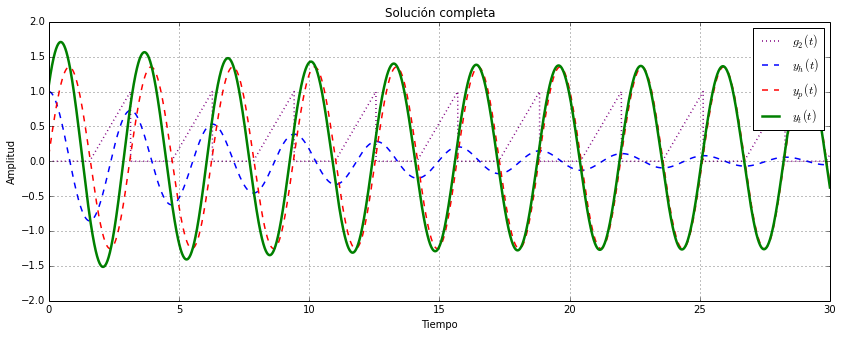

In [19]:
param = [gamma,omega0,y0,dy0]
t=arange(0.,50*omega0,dt)
yh = sol_h(param,t)
# Suma de soluciones
yt = yh + yp

fig = figure(figsize=(14,5), dpi=100)
title(u'Solución completa')
xlabel('Tiempo')
ylabel('Amplitud')
xlim([0,30])
plot(t,gt_2(t%L,L),color="purple",ls=":",lw=1.5,label="$g_2(t)$")
plot(t,yh,color="blue",ls="--",lw=1.5,label=u"$y_h (t)$")
plot(t,yp,"r--",lw=1.5,label=u"$y_p (t)$")
plot(t,yt,"g",lw=2.5,label=u"$y_t (t)$")
grid(True)
legend()
print "Suma del valor absoluto de los coeficientes en resonancia", abs(ai_2[1]) + abs(bi_2[1])

Uno se puede preguntar sobre el comportamiento del sistema ante los forzamientos dados por $g_0 (t)$ y $g_1 (t)$. En el caso de $g_0 (t)$ es evidente que se está en resonancia y por lo tanto la respuesta del sistema se verá amplificada. La gráfica de abajo para $g_0 (t)$ es análoga a la que se presenta para $g_1 (t)$ y se puede observar que la respuesta del sistema es mayor debido a que el valor del coeficiente que se encuentra en resonancia es $1$, mientras que para $g_2 (t)$ los coeficientes que se mencionan en el párrafo anterior suman aproximadamente $0.52$. Es decir, la parte con la que contribuye $g_2 (t)$ para la resonancia es la básicamente la mitad de lo que hace $g_0 (t)$.

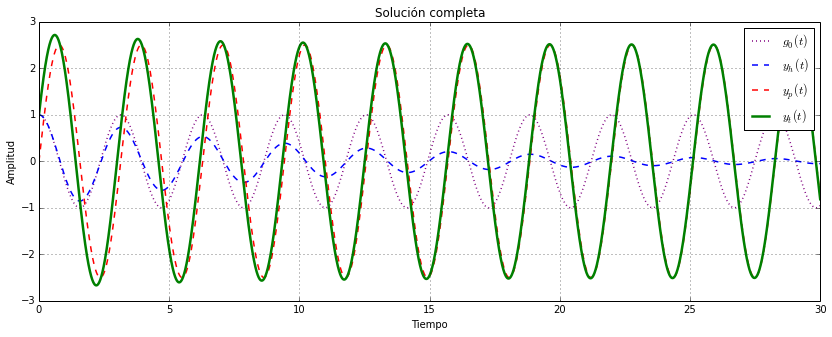

In [20]:
yp_0 = sol_p(Nmax,param,t,L,gt_0)
yt_0 = yh + yp_0
fig = figure(figsize=(14,5), dpi=100)
title(u'Solución completa')
xlabel('Tiempo')
ylabel('Amplitud')
xlim([0,30])
plot(t,gt_0(t%L,L),color="purple",ls=":",lw=1.5,label="$g_0(t)$")
plot(t,yh,color="blue",ls="--",lw=1.5,label=u"$y_h (t)$")
plot(t,yp_0,"r--",lw=1.5,label=u"$y_p (t)$")
plot(t,yt_0,"g",lw=2.5,label=u"$y_t (t)$")
grid(True)
legend()

En el caso de $g_1 (t)$ se puede observar que también una parte de la función está en resonancia y la respuesta del sistema nuevamente se amplifica de manera análoga a como lo hace $g_2 (t)$.  La diferencia es que la respuesta final se observa visiblemente mayor hacia arriba debido a que el coeficiente $a_0$ para este forzamiento proporciona una fuerza positiva constante. 

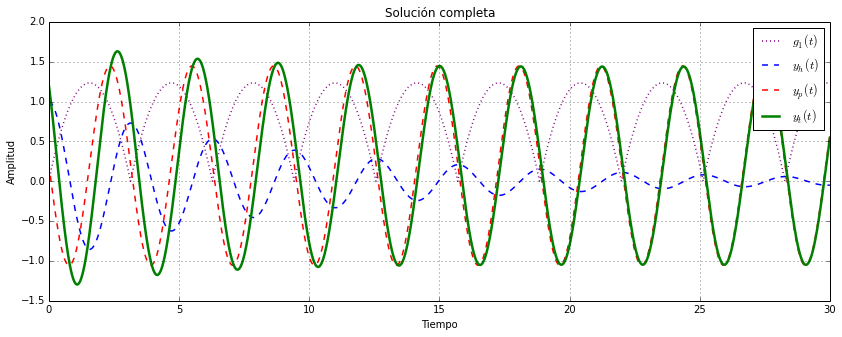

In [21]:
yp_1 = sol_p(Nmax,param,t,L,gt_1)
yt_1 = yh + yp_1
fig = figure(figsize=(14,5), dpi=100)
title(u'Solución completa')
xlabel('Tiempo')
ylabel('Amplitud')
xlim([0,30])
plot(t,gt_1(t%L,L),color="purple",ls=":",lw=1.5,label="$g_1(t)$")
plot(t,yh,color="blue",ls="--",lw=1.5,label=u"$y_h (t)$")
plot(t,yp_1,"r--",lw=1.5,label=u"$y_p (t)$")
plot(t,yt_1,"g",lw=2.5,label=u"$y_t (t)$")
grid(True)
legend()

En los tres casos de forzamiento se observa que el comportamiento final es armónico y en algunos casos con mayor amplitud. Lo anterior se debe a que únicamente las componentes de la serie de Fourier que están en resonancia son la que se ven amplificadas.

Veamos un ejemplo en el que se propone un forzamiento que no está en resonancia con el sistema.  En este caso supongamos que se tiene $g_3 (t) = \cos \left(\frac{4\pi}{L} t \right)$ y en la siguiente rutina se pueden hacer los cálculos análogos a los de las funciones anteriores. Como se puede observar, la respuesta del sistema es tal que el forzamiento se ve amortiguado y únicamente exhibe un pequeño transitorio que va disminuyendo.

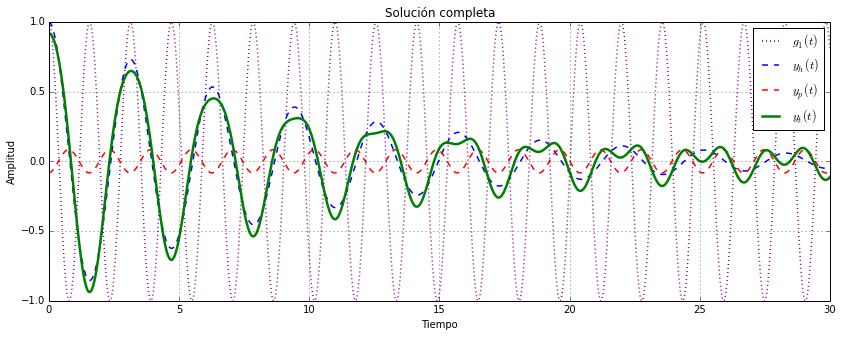

In [22]:
def gt_3(t,L):
    g = cos((4*pi*t)/L)
    return g

yp_3 = sol_p(Nmax,param,t,L,gt_3)
yt_3 = yh + yp_3
fig = figure(figsize=(14,5), dpi=100)
title(u'Solución completa')
xlabel('Tiempo')
ylabel('Amplitud')
xlim([0,30])
plot(t,gt_3(t%L,L),color="purple",ls=":",lw=1.5,label="$g_1(t)$")
plot(t,yh,color="blue",ls="--",lw=1.5,label=u"$y_h (t)$")
plot(t,yp_3,"r--",lw=1.5,label=u"$y_p (t)$")
plot(t,yt_3,"g",lw=2.5,label=u"$y_t (t)$")
grid(True)
legend()

Regressar a la [Caja de herramientas](http://sistemas.fciencias.unam.mx/~rich/caja/IPy_notebooks/notebooks.html)